In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

/Users/ankit/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/ankit/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def get_data():
    x1,x2,y1,y2,c1,c2 = train_test_split(*pd.read_csv('ds3.csv').as_matrix().T)
    c1 = c1-1
    c2 = c2-1
    return np.array([x1,y1]).T,np.array([x2,y2]).T,c1,c2

In [3]:
def build_model(layers=[32,32,32],final_activation='sigmoid'):
    inp = keras.Input(shape=(2,))
    l = inp
    for count in layers:
        l = keras.layers.Dense(32,activation='relu')(l)
    l = keras.layers.Dense(1,activation=final_activation)(l)
    m = keras.Model(inputs=inp, outputs=l)
    m.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return m

In [4]:
def plot_acc(x,y,m):
    a,b = x.T
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(a,b,y)
    ax.scatter(a,b,m.predict(x))  
    plt.show()

5000/5000 [==============================] - 0s 19us/step


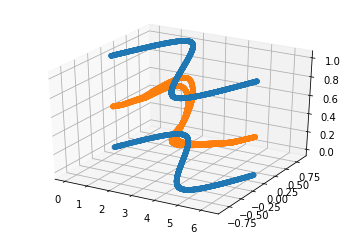

5000/5000 [==============================] - 0s 24us/step


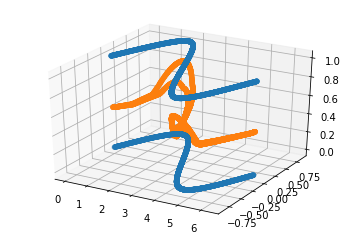

5000/5000 [==============================] - 0s 38us/step


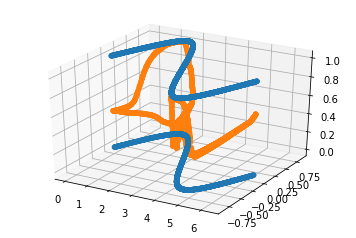

5000/5000 [==============================] - 0s 50us/step


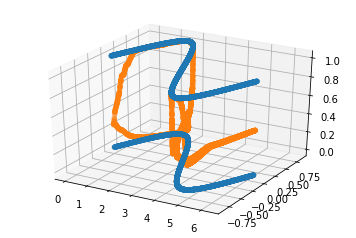

5000/5000 [==============================] - 0s 46us/step


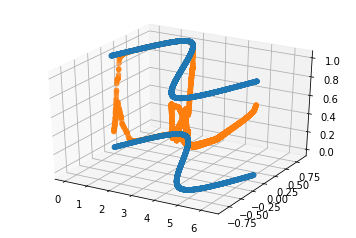

5000/5000 [==============================] - 0s 55us/step


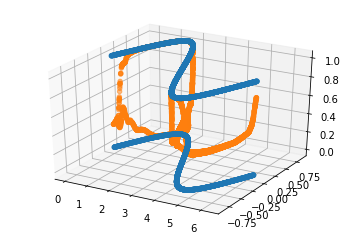

5000/5000 [==============================] - 0s 64us/step


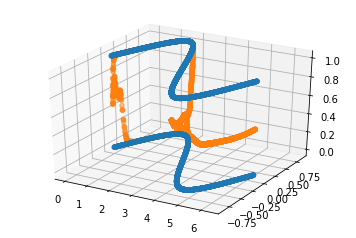

5000/5000 [==============================] - 0s 75us/step


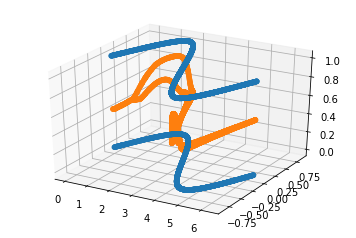

5000/5000 [==============================] - 0s 88us/step


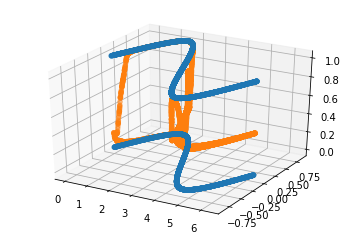

5000/5000 [==============================] - 0s 92us/step


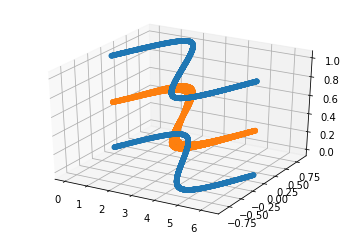

In [5]:
layer_count = []
loss = []

layers = []
for i in range(10):
    layers.append(32)
    x_train,x_test,y_train,y_test = get_data()
    m = build_model(layers=layers)
    m.fit(x_train,y_train,epochs=5,verbose=0)
    m.evaluate(x_test,y_test)
    print("{} Layers:".format(i+1))
    plot_acc(x_test,y_test,m)
    layer_count.append(len(layers))
    loss.append(m.history.history['loss'][-1])
    

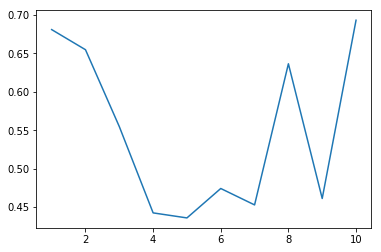

(5, 0.435964899843109)

In [11]:
plt.plot(layer_count,loss)
plt.show()
layer_count[4],loss[4]